In [1]:
import pandas as pd
from pull_data import get_df

import matplotlib.pyplot as plt

# load data from firebase server
df = get_df()

In [2]:
df.head()

,endTime,startTime,url
0,1518935096389,1518935096099,file:///home/keller/Documents/Github/TJ-habit-...
1,1518935096651,1518935096406,chrome://extensions/
2,1518935097536,1518935097333,chrome://extensions/
3,1518935097819,1518935097554,https://console.firebase.google.com/u/0/projec...
4,1518935097957,1518935097822,file:///home/keller/Documents/Github/TJ-habit-...


In [4]:
from urllib.parse import urlparse

# parse hostnames and paths
urlobjs = [urlparse(df.iloc[i]['url']) for i in range(len(df))]
hostnames = [obj.hostname for obj in urlobjs]
paths = [obj.path for obj in urlobjs]
times = [df.iloc[i]['endTime'] - df.iloc[i]['startTime'] for i in range(len(df))]
df['hostname'] = pd.Series(hostnames)
df['path'] = pd.Series(paths)
df['time'] = pd.Series(times)
df.head()

,endTime,startTime,url,hostname,path,time
0,1518935096389,1518935096099,file:///home/keller/Documents/Github/TJ-habit-...,None,/home/keller/Documents/Github/TJ-habit-bot/fir...,290
1,1518935096651,1518935096406,chrome://extensions/,extensions,/,245
2,1518935097536,1518935097333,chrome://extensions/,extensions,/,203
3,1518935097819,1518935097554,https://console.firebase.google.com/u/0/projec...,console.firebase.google.com,/u/0/project/monitor-a80a5/database/monitor-a8...,265
4,1518935097957,1518935097822,file:///home/keller/Documents/Github/TJ-habit-...,None,/home/keller/Documents/Github/TJ-habit-bot/fir...,135


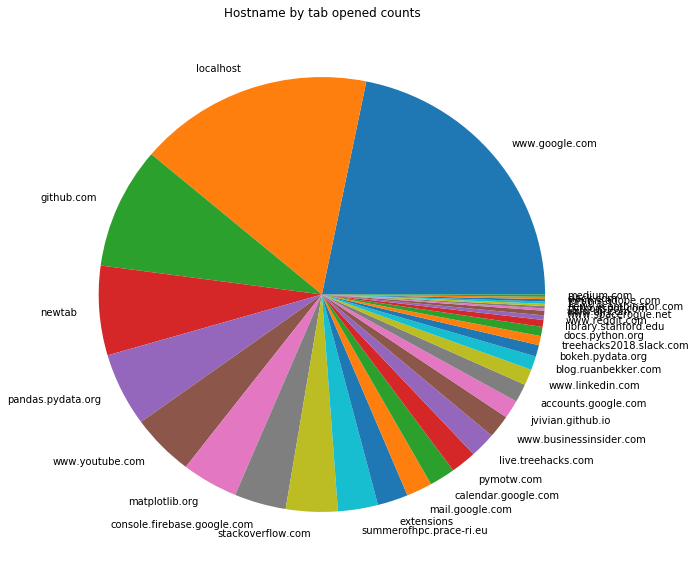

In [5]:
hostname_counts = df['hostname'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(hostname_counts.values, labels=hostname_counts.keys())
plt.title('Hostname by tab opened counts')
plt.show()

In [6]:
hostname_times = pd.Series()
for i in range(len(df)):
    row = df.iloc[i]
    hostname = row['hostname']
    if hostname in hostname_times.keys():
        hostname_times[hostname] += row['time']
    else:
        hostname_times[hostname] = row['time']
#     if row['time'] > 1000:
#         print(row['time'], row['hostname'])
hostname_times = hostname_times.sort_values(ascending=False)
hostname_times

localhost                      5199212
console.firebase.google.com    3057432
www.google.com                 3042737
live.treehacks.com              932475
www.businessinsider.com         914699
github.com                      908026
blog.ruanbekker.com             826458
www.dji.com                     548242
www.youtube.com                 427896
treehacks2018.slack.com         348471
summerofhpc.prace-ri.eu         333582
stackoverflow.com               319491
mail.google.com                 312341
extensions                      307322
pandas.pydata.org               223192
matplotlib.org                  217563
bokeh.pydata.org                185428
newtab                          151874
jvivian.github.io                90345
docs.python.org                  70130
pymotw.com                       67936
news.ycombinator.com             29743
pythonspot.com                   26135
forums.adobe.com                 22776
slack.com                        21242
calendar.google.com      

In [7]:
print('hostname_counts STD: ', (hostname_counts.values / hostname_counts.values.mean()).std())
print('hostname_times STD: ', (hostname_times.values / hostname_times.values.mean()).std())

hostname_counts STD:  1.54442432523
hostname_times STD:  1.97029175827


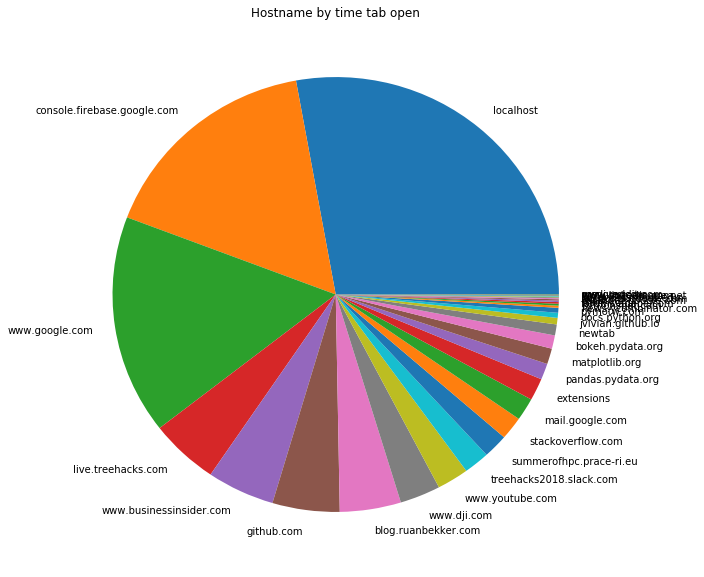

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(hostname_times.values, labels=hostname_times.keys())
plt.title('Hostname by time tab open')
plt.show()

In [9]:
top_hostnames = df['hostname'].value_counts()[:14]
top_hostnames['<OTHER>'] = len(df) - top_hostnames.values.sum()

In [10]:
import numpy as np

# coprob[i][j] := expected number of  js in the next five tabs after an i
coocurrence = np.zeros((15, 15))

def get_index(hostname):
    if hostname in top_hostnames.keys()[:-1]:
        return top_hostnames.keys().get_loc(hostname)
    else:
        return len(top_hostnames.keys()) - 1

w = 20 # window size
for src in range(len(df)):
#     print(st)
    i = get_index(df.iloc[src]['hostname'])
#     print(i, df.iloc[st]['hostname'])
    for dst in range(src+1, min(src+w+1, len(df)-w+1)):
#         print(src)
        j = get_index(df.iloc[dst]['hostname'])
#         print(j, df.iloc[nd]['hostname'])
        coocurrence[i, j] += 1

for i in range(15):
    coocurrence[i] /= top_hostnames[i]

0 www.google.com
1 localhost
2 github.com
3 newtab
4 pandas.pydata.org
5 www.youtube.com
6 matplotlib.org
7 console.firebase.google.com
8 stackoverflow.com
9 summerofhpc.prace-ri.eu
10 extensions
11 mail.google.com
12 calendar.google.com
13 pymotw.com
14 <OTHER>


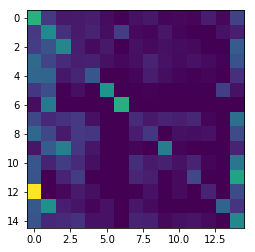

In [11]:
import matplotlib.pyplot as plt

for pair in enumerate(top_hostnames.keys()):
    print(*pair)

plt.imshow(coocurrence)
plt.show()

In [12]:
for i in range(coocurrence.shape[0]):
    coocurrence[i, i] = 0

nearest = np.argmax(coocurrence, axis=0)
for i, j in enumerate(nearest):
    print(top_hostnames.keys()[i], top_hostnames.keys()[j])

www.google.com calendar.google.com
localhost pymotw.com
github.com summerofhpc.prace-ri.eu
newtab mail.google.com
pandas.pydata.org stackoverflow.com
www.youtube.com github.com
matplotlib.org localhost
console.firebase.google.com extensions
stackoverflow.com newtab
summerofhpc.prace-ri.eu console.firebase.google.com
extensions console.firebase.google.com
mail.google.com console.firebase.google.com
calendar.google.com www.google.com
pymotw.com www.youtube.com
<OTHER> mail.google.com
